<a href="https://colab.research.google.com/github/beedoop1/Education-Inequality/blob/main/Jason_Rong_DATA_3320_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

The purpose of this project is to determine whether school performance can be predicted by socioeconomic factors in the U.S. We will be taking a look at the average performance of a student on the ACT or SAT.

## Description

There are two data sets being used. The primary data set is the Edgap data set from 2016 which includes about average ACT or SAT scores for schools and several socioeconomic characteristics (household income, unemployment, adult educational attainment, and family structure) of the school district. Our second data set includes basic information about each school from the National Center for Education Statistics.

Link to EdGap: https://www.edgap.org/#6/37.886/-96.868

Link to the National Center for Education Statistics: https://nces.ed.gov/ccd/pubschuniv.asp

Link to notebook with clean data: https://colab.research.google.com/drive/1grNK5zICWjSvZChM2dfAAL4MUofwMz1K?usp=sharing

## Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/beedoop1/Education-Inequality/main/education_inequality.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/beedoop1/Education-Inequality/main/training.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/beedoop1/Education-Inequality/main/test.csv')

##### $\rightarrow$ Review the contents of the data set.

Contents of the original dataframe

In [23]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High


In [24]:
df.describe()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,zip_code
count,7.875000e+03,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,3.323503e+11,0.098024,0.569537,0.635289,52164.792856,20.220925,0.419192,44886.922032
std,1.326061e+11,0.058124,0.165756,0.194935,24168.294141,2.531581,0.237603,24062.232057
min,1.000016e+11,0.000000,0.091493,0.000000,3589.000000,12.362637,0.000000,1001.000000
25%,2.104950e+11,0.058581,0.451369,0.526190,36813.500000,18.663004,0.238504,28457.500000
50%,3.600086e+11,0.085315,0.555996,0.668132,47026.000000,20.400000,0.379828,45255.000000
75%,4.700001e+11,0.122429,0.677160,0.777502,61488.500000,21.935287,0.571029,62371.000000
max,5.605830e+11,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729,99403.000000


Contents of the train dataframe from the train/test split.

In [25]:
df_train.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,5.513410e+11,0.067101,0.604018,0.714894,50784.0,0.224732,23.700000
1,1.200510e+11,0.085938,0.834204,0.726644,48417.0,0.551678,25.744811
2,3.703090e+11,0.084557,0.586071,0.566284,42870.0,0.286164,22.838828
3,4.825740e+11,0.082069,0.619658,0.719807,58056.0,0.605316,18.736264
4,1.201650e+11,0.225114,0.477498,0.686850,32449.0,0.436580,18.492063


Contents of the test dataframe from the train/test split.

In [26]:
df_test.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,4.839300e+11,0.143791,0.618896,0.522890,24718.0,0.288026,20.714286
1,1.300510e+11,0.116625,0.498554,0.541104,44851.0,0.189456,21.178266
2,4.816230e+11,0.053030,0.934718,0.654628,51014.0,0.571687,19.273504
3,3.700012e+11,0.064734,0.812150,0.748106,53840.0,0.421151,19.493284
4,2.509930e+11,0.198146,0.659930,0.870822,57151.0,0.457105,19.200244


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.
Do areas with a higher married percentage lead to a result in a higher average ACT score?

How do areas with a lower rate of unemployment fair against an area with a higher rate of unemployment on the ACT?

Do families with a higher income outperform areas with a lower income on the ACT?


## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

Making plots of how food affects a student's scores.

Text(0, 0.5, 'Count')

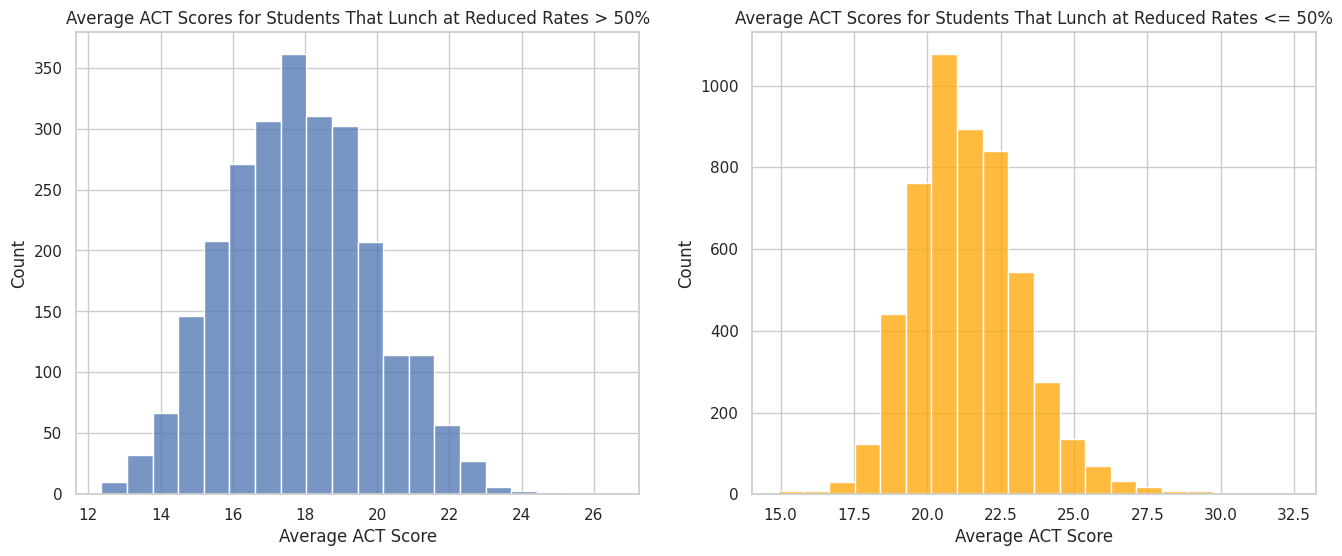

In [95]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
higher_bound_lunch = df[df['percent_lunch'] > 0.5]
sns.histplot(x=higher_bound_lunch['average_act'], bins=20)
plt.title('Average ACT Scores for Students That Lunch at Reduced Rates > 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
lower_bound_lunch = df[(df['percent_lunch'] > 0) & (df['percent_lunch'] <= 0.5)]
sns.histplot(x=lower_bound_lunch['average_act'], bins=20, color='orange')
plt.title('Average ACT Scores for Students That Lunch at Reduced Rates <= 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

We see that students who receive free or reduced price lunch do worse than students that don't receive free or reduced price lunch. This could be due to the fact that those students attend a more expensive school which also means their family may be wealthier than the others which could tie the two factors together.

Making two plots to show how unemployment affects a kids ACT scores.

Text(0, 0.5, 'Count')

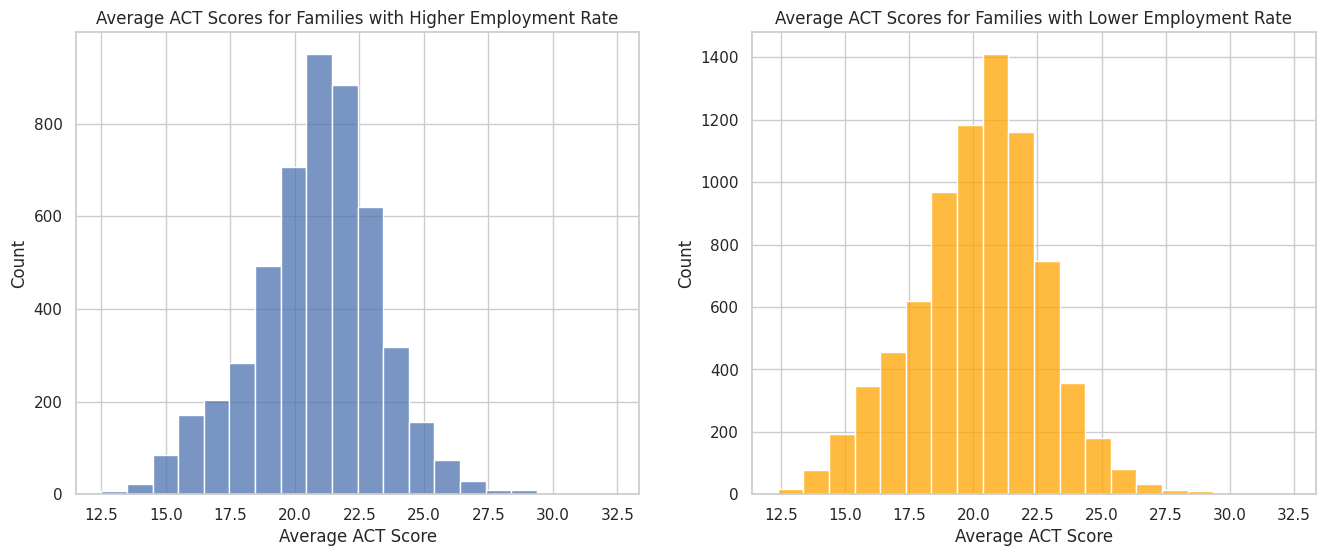

In [86]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
higher_bound_unemployment = df[df['percent_college'] > 0.5]
sns.histplot(x=higher_bound_unemployment['average_act'], bins=20)
plt.title('Average ACT Scores for Families with Higher Employment Rate')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
lower_bound_unemployment = df[(df['rate_unemployment'] > 0) & (df['rate_unemployment'] <= 0.5)]
sns.histplot(x=lower_bound_unemployment['average_act'], bins=20, color='orange')
plt.title('Average ACT Scores for Families with Lower Employment Rate')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

From a quick glance at this graph, it looks about even as to how unemployment rates affects ACT scores, but we do see around 22.5, the kids with employed parents tend to do better around that range. While it doesn't look like unemployment rates play that big of a part in affecting ACT scores, they still impact them to some degree.

Making plots if the average income is greater than 50000 and less than or equal to 50000.

Text(0, 0.5, 'Count')

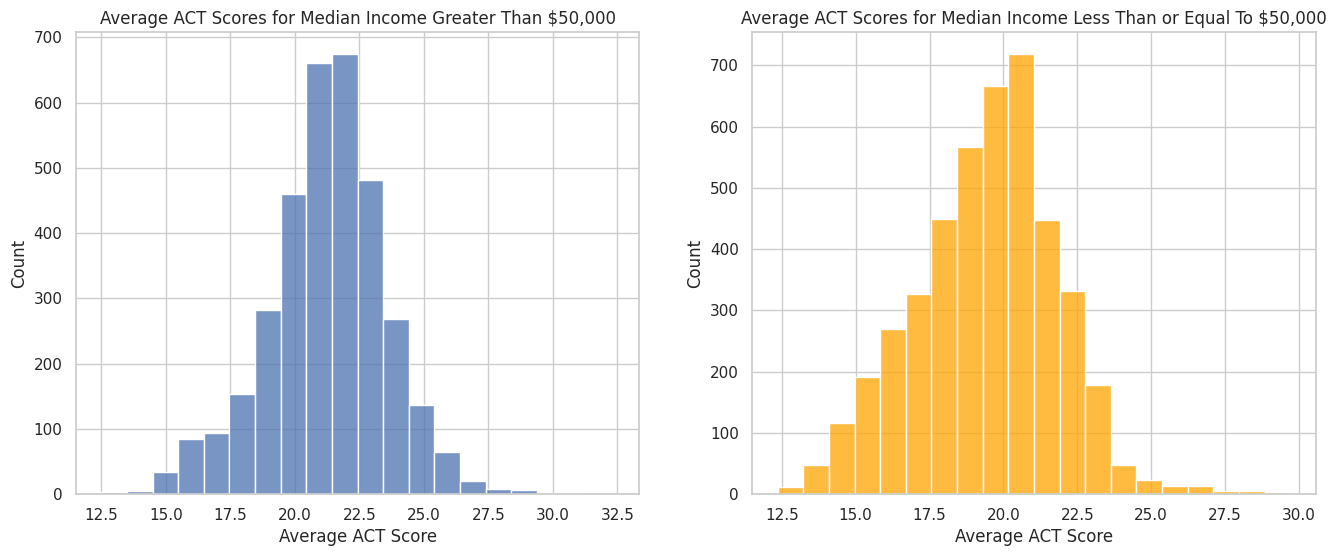

In [81]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
higher_bound_income = df[df['median_income'] > 50000]
sns.histplot(x=higher_bound_income['average_act'], bins=20)
plt.title('Average ACT Scores for Median Income Greater Than $50,000')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
lower_bound_income = df[df['median_income'] <= 50000]
sns.histplot(x=lower_bound_income['average_act'], bins=20, color='orange')
plt.title('Average ACT Scores for Median Income Less Than or Equal To $50,000')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

We can see between these two plots that households that make an average income of greater than $50000 perform have kids that perform better on the ACT. We see on the lower income side, there are more kids scoring lower than kids coming from a wealthier family. This is also proven on the higher end of the scores on the ACT. The kids coming from a wealthier family have a higher count in the higher ranges. Wealth could impact the kids because the kids might have to worry about other factors such as food or they may have to get jobs to also help support their families.

Creating two plots for kids with parents that attended college.

Text(0, 0.5, 'Count')

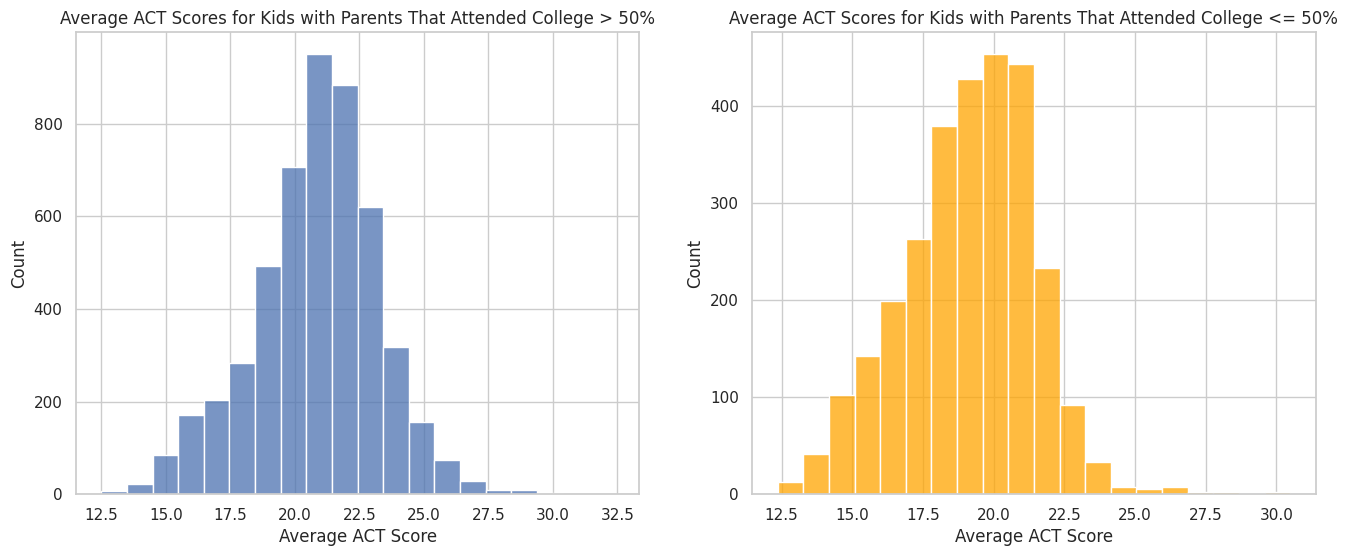

In [83]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
higher_bound_college = df[df['percent_college'] > 0.5]
sns.histplot(x=higher_bound_college['average_act'], bins=20)
plt.title('Average ACT Scores for Kids with Parents That Attended College > 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
lower_bound_marriage = df[(df['percent_college'] > 0) & (df['percent_college'] <= 0.5)]
sns.histplot(x=lower_bound_marriage['average_act'], bins=20, color='orange')
plt.title('Average ACT Scores for Kids with Parents That Attended College <= 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

We see that kids with parents on the higher rate of attending college scores higher than kids with parents that didn't attend college. This could affect the kid's performance because the parents or parent could have helped to teach their kids some of the material covered on the ACT.

Creating two plots to see the differences in ACT scores if the area's married rate is greater than and less than or equal to 50%.

Text(0, 0.5, 'Count')

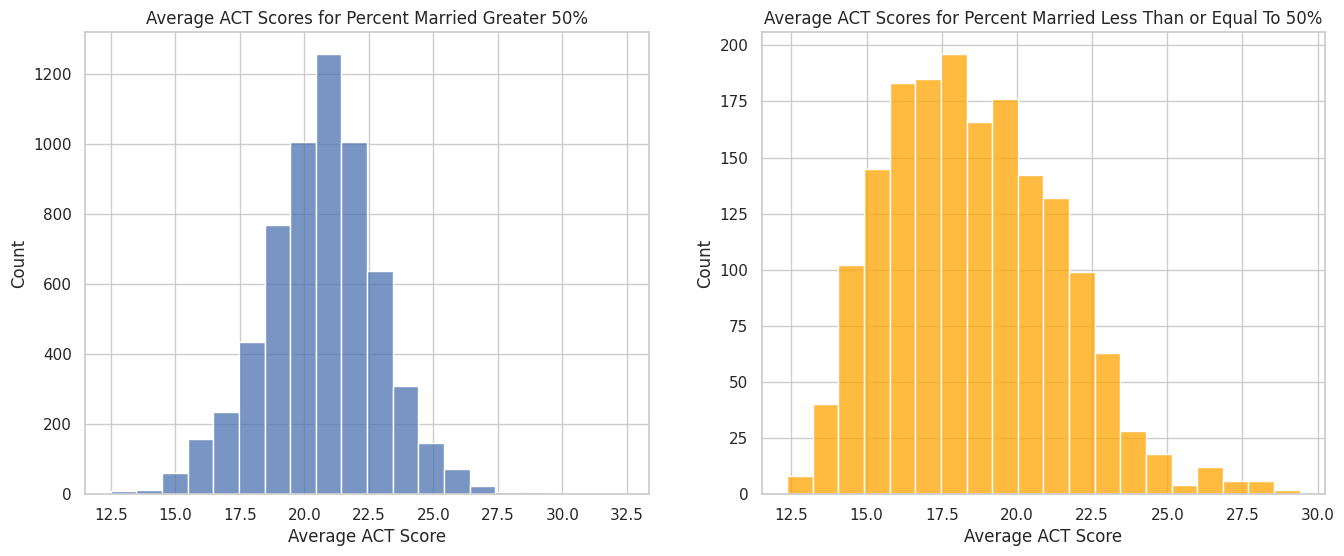

In [82]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
higher_bound_marriage = df[df['percent_married'] > 0.5]
sns.histplot(x=higher_bound_marriage['average_act'], bins=20)
plt.title('Average ACT Scores for Percent Married Greater 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
lower_bound_marriage = df[(df['percent_married'] > 0) & (df['percent_married'] <= 0.5)]
sns.histplot(x=lower_bound_marriage['average_act'], bins=20, color='orange')
plt.title('Average ACT Scores for Percent Married Less Than or Equal To 50%')
plt.xlabel('Average ACT Score')
plt.ylabel('Count')

We can see between these two plots, students with married parents perform significantly better on the ACT than kids without married parents. Judging from this graph, we are able to see that parents play a huge role in how well a child does on test. (This answers my additional step question.)

Normalizing the train and test dataframe and then checking to see if the contents have changed.

In [27]:
columns_to_normalize = [col for col in df_train.columns if col not in ["id", "average_act"]]
df_train[columns_to_normalize] = (df_train[columns_to_normalize] - df_train[columns_to_normalize].mean(axis=0)) / df_train[columns_to_normalize].std(axis=0)
df_test[columns_to_normalize] = (df_test[columns_to_normalize] - df_test[columns_to_normalize].mean(axis=0)) / df_test[columns_to_normalize].std(axis=0)

In [28]:
df_train.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,5.513410e+11,-0.532010,0.213568,0.405310,-0.055729,-0.819509,23.700000
1,1.200510e+11,-0.208483,1.607032,0.465795,-0.154570,0.560818,25.744811
2,3.703090e+11,-0.232194,0.104922,-0.359690,-0.386201,-0.560154,22.838828
3,4.825740e+11,-0.274931,0.308247,0.430601,0.247935,0.787274,18.736264
4,1.201650e+11,2.181952,-0.552342,0.260948,-0.821361,0.074887,18.492063


In [29]:
df_test.head()

,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,average_act
0,4.839300e+11,0.796121,0.274771,-0.551152,-1.103552,-0.550922,20.714286
1,1.300510e+11,0.325697,-0.441477,-0.458990,-0.299482,-0.960567,21.178266
2,4.816230e+11,-0.775573,2.154478,0.115441,-0.053345,0.627945,19.273504
3,3.700012e+11,-0.572896,1.424978,0.588442,0.059520,0.002335,19.493284
4,2.509930e+11,1.737390,0.518997,1.209385,0.191754,0.151753,19.200244


Seperating the train and test split to get the feature and target for both dataframes.

In [39]:
X_train = df_train.drop(columns="average_act")
y_train = df_train["average_act"]

X_test = df_test.drop(columns="average_act")
y_test = df_test["average_act"]

Performing linear regression for the features and targets, and getting the prediction of the values of the target. Also calculating the root mean squared error.

In [40]:
beta_train, _, _, _ = np.linalg.lstsq(X_train, y_train)
y_pred_train = np.matmul(X_train, beta_train)
one_train = np.linspace(y_train.min(), y_train.max(), 100)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))

beta_test, _, _, _ = np.linalg.lstsq(X_test, y_test)
y_pred_test = np.matmul(X_test, beta_test)
one_test = np.linspace(y_test.min(), y_test.max(), 100)
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))

<ipython-input-40-24c12a096a08>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_train, _, _, _ = np.linalg.lstsq(X_train, y_train)
<ipython-input-40-24c12a096a08>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_test, _, _, _ = np.linalg.lstsq(X_test, y_test)


Making plots of the train and test split.

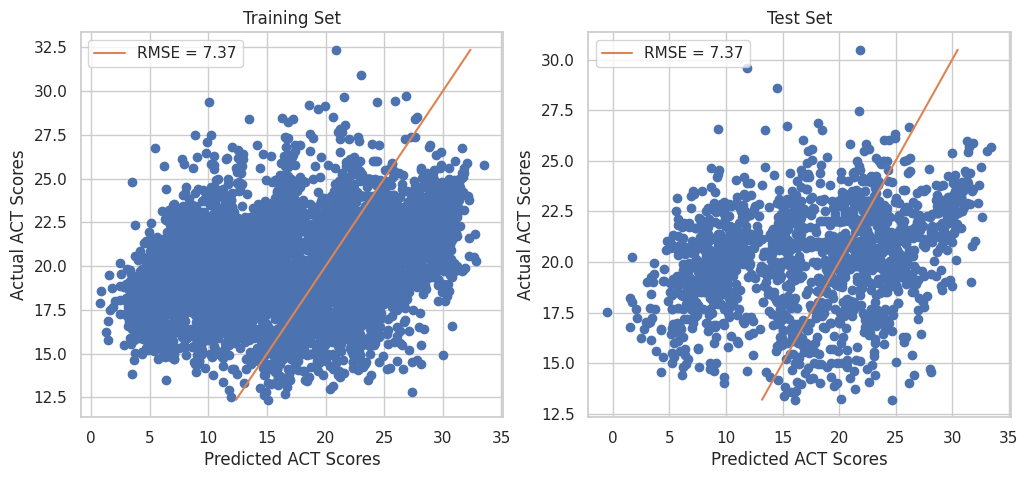

In [46]:
fig,(ax1, ax2) = plt.subplots(1, 2)
ax1.plot(y_pred_train, y_train, 'o')
ax1.plot(one_train, one_train, '-', label = f"RMSE = {rmse_train:.2f}")
ax1.set_title("Training Set")
ax1.set_xlabel("Predicted ACT Scores")
ax1.set_ylabel("Actual ACT Scores")
ax1.legend()

ax2.plot(y_pred_test, y_test, 'o')
ax2.plot(one_test, one_test, '-', label = f"RMSE = {rmse_train:.2f}")
ax2.set_title("Test Set")
ax2.set_xlabel("Predicted ACT Scores")
ax2.set_ylabel("Actual ACT Scores")
ax2.legend()
fig.set_size_inches(12, 5)

From this train/test split, we can see that our prediction has around a 7.37 difference on average from the actual scores.

## Conclusion

Provide a brief description of your conclusions.

From the graphs we made and the analysis discussed we can say that socioeconomic factors definitely play a role in how well a student does on the ACT. While we can't predict the exact ACT score a student would get, it can be assumed that students coming from a more fortunate background are more likely to do better on the ACT than students coming from a lesser fortunate background. There are so many factors at play that can increase a student's chances of doing good and bad some out of their control. In conclusion, we can predict how a student might do based on their background, but there is also no way for certain we can tell what a student would score as that differs from person to person because two students with the same background could produce two entirely different results. One might perform really well and the other might perform really bad. This could be due to how hard one of them studies compared to the other, so we can predict how someone could do based on their background or we can be entirely off. However, if we would have to assume based on a large set of students and how they would do, I believe we can predict the average ACT score on how they will do.